# Model Training

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_addons as tfa
import visualkeras

from tqdm import tqdm
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from tensorflow.keras.optimizers import Adam

### Read Processed Data

In [2]:
listings_df = pd.read_csv('../data/processed/processed-listings.csv').dropna()
print('Number of listings: ' + str(len(listings_df)))

Number of listings: 94639


In [3]:
listings_df.head()

,Subtype,Style,Living Area,Lot Dimensions,Bedrooms,Bathrooms,Levels,Listing Date,Listing Year,Year of Construction,Age,Location,Price
0,2 Storey,2 storey,1191,4076,3,1,2,2020-12-01,2020,2004,16,Beauport,332500
1,Bungalow,Open area,1261,9500,2,1,1,2021-12-01,2021,1957,64,Portneuf,265000
2,Townhouse,Unknown,1645,1360,3,1,3,2021-11-01,2021,2006,15,Mercier-Hochelaga-Maisonneuve,612000
3,Semi-detached,2 storey,2400,4471,4,2,2,2021-12-01,2021,1989,32,Gatineau,360000
4,2 Storey,Unknown,1800,16090,5,2,2,2021-09-01,2021,1990,31,Lac-Saint-Jean-Est,284000


### Choosing columnns

In [4]:
ordinal_cols = []
one_hot_cols = ['Subtype', 'Location']
numerical_cols = ['Living Area', 'Bedrooms', 'Bathrooms', 'Levels', 'Listing Year', 'Age']
target_col = ['Price']

In [5]:
listings_df = listings_df[ordinal_cols + one_hot_cols + numerical_cols + target_col]
listings_df.head()

,Subtype,Location,Living Area,Bedrooms,Bathrooms,Levels,Listing Year,Age,Price
0,2 Storey,Beauport,1191,3,1,2,2020,16,332500
1,Bungalow,Portneuf,1261,2,1,1,2021,64,265000
2,Townhouse,Mercier-Hochelaga-Maisonneuve,1645,3,1,3,2021,15,612000
3,Semi-detached,Gatineau,2400,4,2,2,2021,32,360000
4,2 Storey,Lac-Saint-Jean-Est,1800,5,2,2,2021,31,284000


### One Hot Encoding

In [6]:
def oh_encode(df_line, col, new_col, val):
    if df_line[col] == val:
        return df_line[new_col] + 1
    else:
        return df_line[new_col]

for col in one_hot_cols:
    for val in tqdm(listings_df[col].unique()):   
        new_col = str(val) + '_' + col
        listings_df[new_col] = 0
        listings_df[new_col] = listings_df.apply(oh_encode, args=(col, new_col, val), axis=1)

    listings_df = listings_df.drop(columns=[col])

100%|██████████| 111/111 [01:37<00:00,  1.14it/s]


In [7]:
listings_df.head()

,Living Area,Bedrooms,Bathrooms,Levels,Listing Year,Age,Price,2 Storey_Subtype,Bungalow_Subtype,Townhouse_Subtype,...,Kirkland_Location,"Senneville, Baie-D'Urfé & Saint-Anne-de-Bellevue_Location",Le Sud-Ouest_Location,Verdun_Location,Beaconsfield_Location,Saint-Léonard_Location,Ville de Mont-Royal_Location,Outremont_Location,Westmount_Location,Ville-Marie_Location
0,1191,3,1,2,2020,16,332500,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1261,2,1,1,2021,64,265000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1645,3,1,3,2021,15,612000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2400,4,2,2,2021,32,360000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1800,5,2,2,2021,31,284000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ordinal Encoding

In [8]:
ordinal_encoders = {}

for col in ordinal_cols:
    ordinal_encoders[col] = OrdinalEncoder()
    ordinal_encoders[col].fit(listings_df[[col]])
    listings_df[col] = ordinal_encoders[col].transform(listings_df[[col]])

listings_df.head()

,Living Area,Bedrooms,Bathrooms,Levels,Listing Year,Age,Price,2 Storey_Subtype,Bungalow_Subtype,Townhouse_Subtype,...,Kirkland_Location,"Senneville, Baie-D'Urfé & Saint-Anne-de-Bellevue_Location",Le Sud-Ouest_Location,Verdun_Location,Beaconsfield_Location,Saint-Léonard_Location,Ville de Mont-Royal_Location,Outremont_Location,Westmount_Location,Ville-Marie_Location
0,1191,3,1,2,2020,16,332500,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1261,2,1,1,2021,64,265000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1645,3,1,3,2021,15,612000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2400,4,2,2,2021,32,360000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1800,5,2,2,2021,31,284000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split Data (Test/Train)

In [250]:
y = listings_df[target_col]
X = listings_df.drop(columns=target_col)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Scale Data
Using Min Max Scaler

In [252]:
scaled_cols = numerical_cols + ordinal_cols

scalers = {}

for col in scaled_cols:
    scalers[col] = MinMaxScaler()
    X_train[col] = scalers[col].fit_transform(X_train[[col]])
    X_test[col] = scalers[col].transform(X_test[[col]])

In [253]:
scale_target = True

if scale_target:
    target_scaler = MinMaxScaler()

    y_train = target_scaler.fit_transform(y_train)
    y_test = target_scaler.fit_transform(y_test)

X_train.head()

,Living Area,Bedrooms,Bathrooms,Levels,Listing Year,Age,2 Storey_Subtype,Bungalow_Subtype,Townhouse_Subtype,Semi-detached_Subtype,...,Kirkland_Location,"Senneville, Baie-D'Urfé & Saint-Anne-de-Bellevue_Location",Le Sud-Ouest_Location,Verdun_Location,Beaconsfield_Location,Saint-Léonard_Location,Ville de Mont-Royal_Location,Outremont_Location,Westmount_Location,Ville-Marie_Location
38113,0.094444,0.25,0.000000,0.5,0.722222,0.568047,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82858,0.135556,0.25,0.000000,1.0,0.777778,0.041420,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14394,0.087333,0.50,0.000000,0.5,0.888889,0.207101,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51881,0.144889,0.50,0.333333,0.0,0.555556,0.059172,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
92137,0.155556,0.25,0.000000,0.0,0.444444,0.023669,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Neural Network Training

In [255]:
model = Sequential()
model.add(Dense(500, input_dim=X_train.shape[-1], activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1, activation="linear"))

print(model.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 500)               63500     
                                                                 
 dense_89 (Dense)            (None, 100)               50100     
                                                                 
 dense_90 (Dense)            (None, 50)                5050      
                                                                 
 dense_91 (Dense)            (None, 1)                 51        
                                                                 
Total params: 118,701
Trainable params: 118,701
Non-trainable params: 0
_________________________________________________________________
None


In [256]:
model.compile(optimizer=Adam(lr=0.01), loss="mean_squared_error")
history = model.fit(X_train, y_train, batch_size=500, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100


c:\Users\simka\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


152/152 [==============================] - 1s 5ms/step - loss: 0.0177 - val_loss: 0.0049
Epoch 2/100
152/152 [==============================] - 1s 4ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 3/100
152/152 [==============================] - 1s 4ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 4/100
152/152 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0043
Epoch 5/100
152/152 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 6/100
152/152 [==============================] - 1s 4ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 7/100
152/152 [==============================] - 1s 5ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 8/100
152/152 [==============================] - 1s 5ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 9/100
152/152 [==============================] - 1s 5ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 10/100
152/152 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0039
E

In [258]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

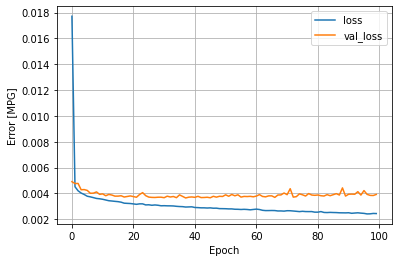

In [259]:
plot_loss(history)

In [260]:
predicted_prices = target_scaler.inverse_transform(model.predict(X_test))
real_prices = target_scaler.inverse_transform(y_test)

In [261]:
test_df = X_test.copy()

for col in scaled_cols:
    test_df[col] = scalers[col].inverse_transform(test_df[[col]])

for col in ordinal_cols:
    test_df[col] = ordinal_encoders[col].inverse_transform(test_df[[col]])

In [262]:
d = {}
d['real price'] = list(real_prices)
d['predicted price'] = list(predicted_prices)

test_df['real price'] = d['real price']
test_df['predicted price'] = d['predicted price']

test_df['real price'] = test_df['real price'].astype(int)
test_df['predicted price'] = test_df['predicted price'].astype(int)

In [263]:
test_df.head(12)

,Living Area,Bedrooms,Bathrooms,Levels,Listing Year,Age,2 Storey_Subtype,Bungalow_Subtype,Townhouse_Subtype,Semi-detached_Subtype,...,Le Sud-Ouest_Location,Verdun_Location,Beaconsfield_Location,Saint-Léonard_Location,Ville de Mont-Royal_Location,Outremont_Location,Westmount_Location,Ville-Marie_Location,real price,predicted price
36485,1203.0,4.0,1.0,1.0,2015.0,30.0,0,1,0,0,...,0,0,0,0,0,0,0,0,498999,270408
80001,1022.0,2.0,1.0,1.0,2019.0,104.0,0,0,0,0,...,0,0,0,0,0,0,0,0,550000,469650
19758,1540.0,3.0,1.0,2.0,2019.0,35.0,0,0,0,0,...,0,0,0,0,0,0,0,0,279900,170460
48664,738.0,3.0,2.0,1.0,2014.0,26.0,0,0,0,0,...,0,0,0,0,0,0,0,0,221500,215643
91107,1183.0,2.0,1.0,2.0,2011.0,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,172000,173166
49701,1042.0,3.0,2.0,1.0,2014.0,24.0,0,0,0,1,...,0,0,0,0,0,0,0,0,218000,213318
37198,864.0,3.0,2.0,1.0,2016.0,35.0,0,1,0,0,...,0,0,0,0,0,0,0,0,165000,168154
32254,1140.0,3.0,1.0,1.0,2016.0,8.0,0,1,0,0,...,0,0,0,0,0,0,0,0,178000,206656
77085,1044.0,2.0,1.0,1.0,2020.0,16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,163000,173934
5731,1120.0,5.0,2.0,1.0,2021.0,31.0,0,1,0,0,...,0,0,0,0,0,0,0,0,290000,254846


In [264]:
errors = abs(predicted_prices - real_prices)
errors_small = list(filter(lambda x: x < 100000, errors))
errors_pct = 100 * (abs(predicted_prices - real_prices) / real_prices)
errors_pct_small = list(filter(lambda x: x < 100, errors_pct))

In [265]:
e_avg = int(np.mean(errors))
e_std = int(np.std(errors))
epct_avg = round(np.mean(errors_pct), 2)
epct_std = round(np.std(errors_pct), 2)

print('Error Mean ($): ' + str(e_avg) + '$')
print('Error std ($): ' + str(e_std) + '$')
print('Error Mean (%): ' + str(epct_avg) + '%')
print('Error std (%): ' + str(epct_std) + '%')

Error Mean ($): 39743$
Error std ($): 46110$
Error Mean (%): 14.89%
Error std (%): 18.44%


In [267]:
filepath = '../model'

save_model = True
if save_model:
    model.save(filepath)

INFO:tensorflow:Assets written to: ../model\assets
